In [1]:
!pip3 install -r requirements.txt

  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:03
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x8

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import seaborn as sns
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

In [5]:
iris_data = load_iris()

In [6]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.2,
    random_state=1,
    stratify=iris_data.target
)

In [9]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv",
    index_col="ID",
)
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    df.drop(columns=["Sales"]),
    df["Sales"],
    test_size=0.2,
    random_state=1
)

In [12]:
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train_iris, y_train_iris)

GradientBoostingClassifier(random_state=1)

In [14]:
gb_clf.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7C647B934240),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7C647B934240),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7C647B934240)],
      dtype=object)

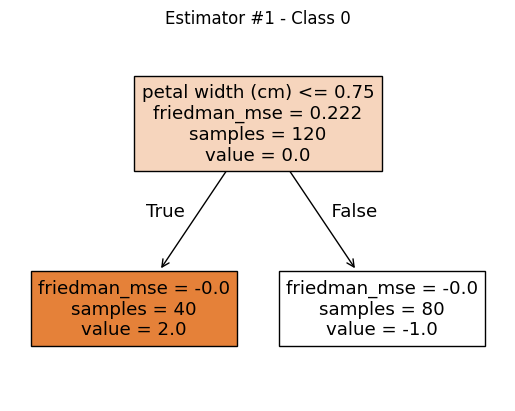

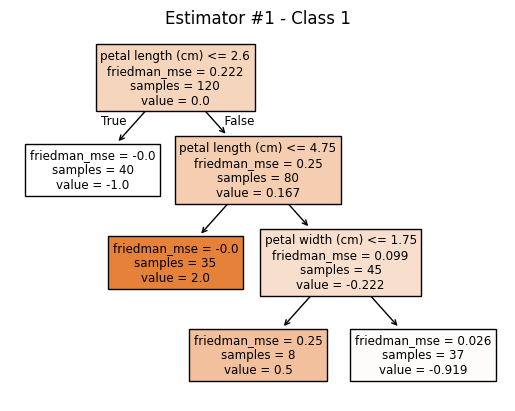

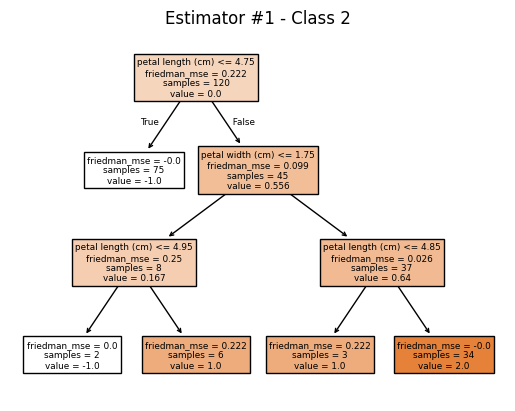

In [16]:
for cls, estimator in enumerate(gb_clf.estimators_[0]):
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True,
    )
    plt.title(f"Estimator #1 - Class {cls}")
    plt.show()

In [18]:
gb_reg = GradientBoostingRegressor(random_state=1)
gb_reg.fit(X_train_ad, y_train_ad)

GradientBoostingRegressor(random_state=1)

In [19]:
gb_reg.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7C647B8D3340)],
      dtype=object)

[Text(0.5, 0.875, 'TV <= 122.05\nfriedman_mse = 28.99\nsamples = 160\nvalue = -0.0'),
 Text(0.25, 0.625, 'TV <= 30.05\nfriedman_mse = 8.263\nsamples = 71\nvalue = -4.218'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TV <= 4.75\nfriedman_mse = 3.205\nsamples = 23\nvalue = -7.303'),
 Text(0.0625, 0.125, 'friedman_mse = 0.64\nsamples = 2\nvalue = -11.411'),
 Text(0.1875, 0.125, 'friedman_mse = 1.689\nsamples = 21\nvalue = -6.911'),
 Text(0.375, 0.375, 'Radio <= 13.45\nfriedman_mse = 3.945\nsamples = 48\nvalue = -2.74'),
 Text(0.3125, 0.125, 'friedman_mse = 0.936\nsamples = 21\nvalue = -4.297'),
 Text(0.4375, 0.125, 'friedman_mse = 2.935\nsamples = 27\nvalue = -1.53'),
 Text(0.75, 0.625, 'Radio <= 26.85\nfriedman_mse = 20.006\nsamples = 89\nvalue = 3.365'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Radio <= 10.3\nfriedman_mse = 3.917\nsamples = 44\nvalue = -0.416'),
 Text(0.5625, 0.125, 'friedman_mse = 0.886\nsamples = 23\nvalue = -1.998'),
 Text(0.6875, 0.125, 'friedman_

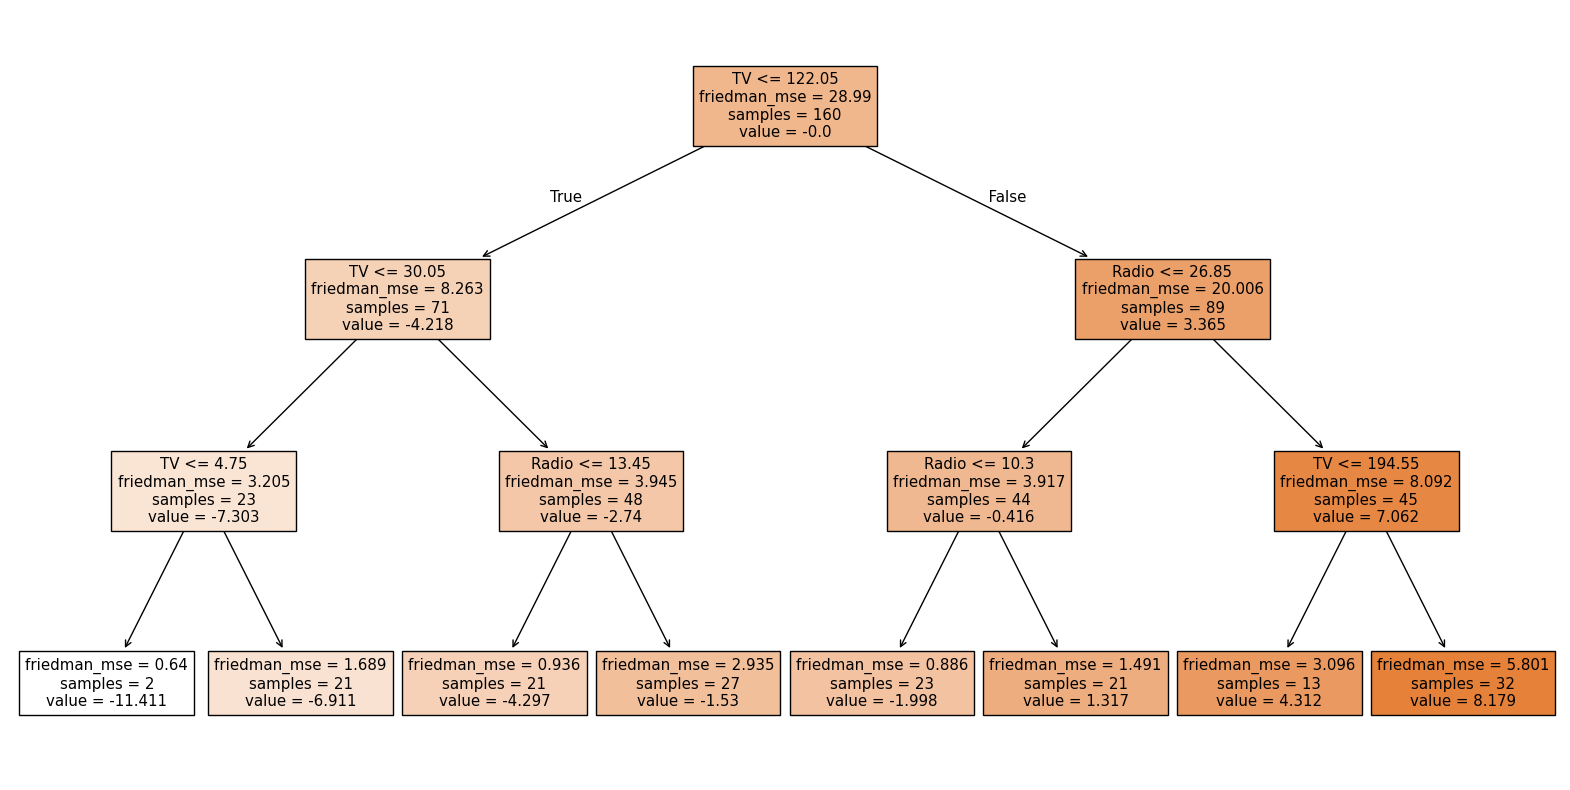

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(
    gb_reg.estimators_[0][0],
    feature_names=["TV", "Radio", "Newspaper"],
    filled=True
)